# Special Extra!!

Getting the best models on the planet to generate an SVG

Inspired by the legendary Simon Willison's Pelican riding a bike test

Key point: this is a very different task to image generation! The model needs to describe the image with lines and shapes.

### This uses OpenRouter.ai so that we easily access the latest models

In [7]:
from dotenv import load_dotenv
from IPython.display import Markdown, display
from datetime import datetime
import time
from revealer import reveal
from openai import OpenAI
import os
load_dotenv(override=True)

True

In [8]:
OPENROUTER_BASE_URL = "https://openrouter.ai/api/v1"
OPENROUTER_API_KEY = os.getenv("OPENROUTER_API_KEY")
if OPENROUTER_API_KEY and OPENROUTER_API_KEY.startswith("sk-or-"):
    print("OPENROUTER_API_KEY looks good so far")
else:
    print("OPENROUTER_API_KEY doesn't seem right")

OPENROUTER_API_KEY looks good so far


In [9]:
openrouter = OpenAI(base_url=OPENROUTER_BASE_URL, api_key=OPENROUTER_API_KEY)

In [10]:
challenge = "a panda rollerblading to work"
prompt = f"Generate an SVG of {challenge}. Respond with the SVG only, no code blocks."
messages = [{"role": "user", "content": prompt}]

In [11]:
def artist(model, effort=None):
    try:
        start = datetime.now()
        response = openrouter.chat.completions.create(model=model, messages=messages, reasoning_effort=effort)
        result = response.choices[0].message.content
        end = datetime.now()
        elapsed = (end - start).total_seconds()
        heading = f"### {model}\n**Time:** {elapsed // 60:.0f} min {elapsed % 60:.0f} s\n\n"
    except Exception as e:
        print(f"Model {model} failed: {e}")
        heading = f"### {model}\n**Error:** {e}\n\n"
        return heading, None
    return heading, result

In [12]:
results = [
    artist("openai/gpt-oss-120b"),
    artist("openai/gpt-5-nano", effort="low"),
    artist("deepseek/deepseek-v3.2"),
    artist("moonshotai/kimi-k2-thinking"),
    artist("x-ai/grok-4.1-fast"),
    artist("anthropic/claude-opus-4.5"),
    artist("openai/gpt-5.2", effort="high"),
    artist("google/gemini-3-pro-preview")
]

Model moonshotai/kimi-k2-thinking failed: Error code: 402 - {'error': {'message': 'This request requires more credits, or fewer max_tokens. You requested up to 65536 tokens, but can only afford 15824. To increase, visit https://openrouter.ai/settings/keys and create a key with a higher total limit', 'code': 402, 'metadata': {'provider_name': None}}, 'user_id': 'user_38Iq2ijP6emBJM1J0VFdrgSKDpR'}
Model anthropic/claude-opus-4.5 failed: Error code: 402 - {'error': {'message': 'This request requires more credits, or fewer max_tokens. You requested up to 64000 tokens, but can only afford 1559. To increase, visit https://openrouter.ai/settings/keys and create a key with a higher total limit', 'code': 402, 'metadata': {'provider_name': None}}, 'user_id': 'user_38Iq2ijP6emBJM1J0VFdrgSKDpR'}
Model openai/gpt-5.2 failed: Error code: 402 - {'error': {'message': 'This request requires more credits, or fewer max_tokens. You requested up to 65536 tokens, but can only afford 2784. To increase, visit

### openai/gpt-oss-120b
**Time:** 0 min 24 s



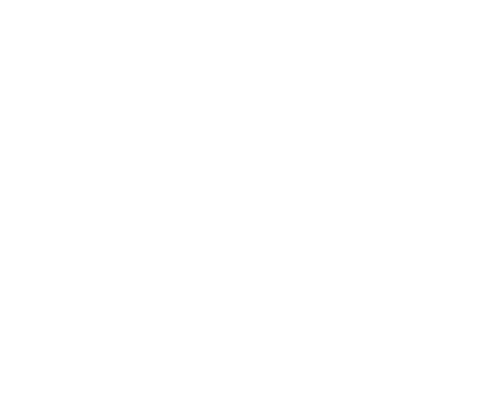

### openai/gpt-5-nano
**Time:** 0 min 13 s



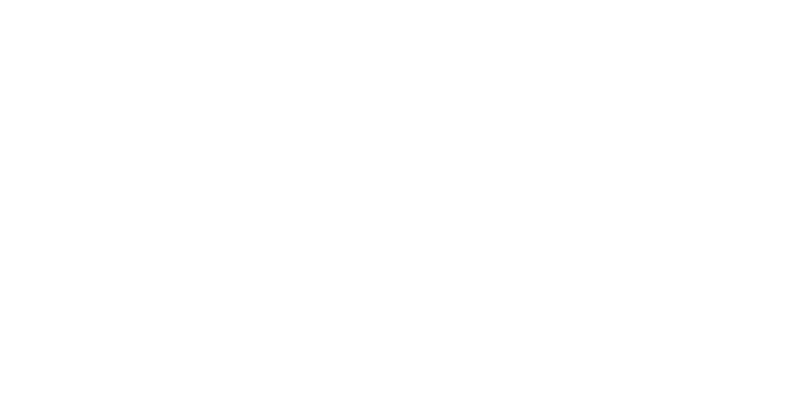

### deepseek/deepseek-v3.2
**Time:** 0 min 35 s



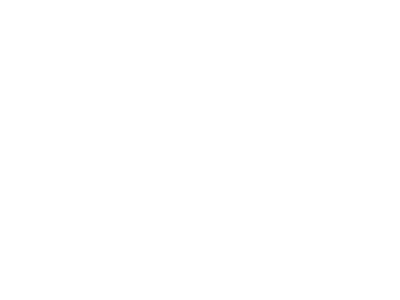

### moonshotai/kimi-k2-thinking
**Error:** Error code: 402 - {'error': {'message': 'This request requires more credits, or fewer max_tokens. You requested up to 65536 tokens, but can only afford 15824. To increase, visit https://openrouter.ai/settings/keys and create a key with a higher total limit', 'code': 402, 'metadata': {'provider_name': None}}, 'user_id': 'user_38Iq2ijP6emBJM1J0VFdrgSKDpR'}



### x-ai/grok-4.1-fast
**Time:** 0 min 27 s



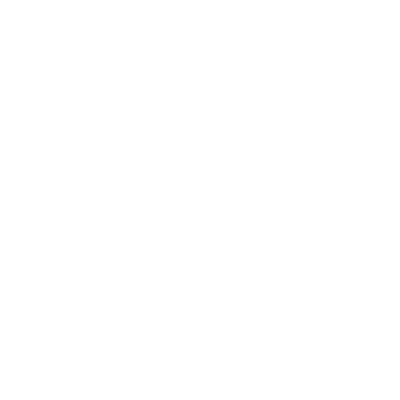

### anthropic/claude-opus-4.5
**Error:** Error code: 402 - {'error': {'message': 'This request requires more credits, or fewer max_tokens. You requested up to 64000 tokens, but can only afford 1559. To increase, visit https://openrouter.ai/settings/keys and create a key with a higher total limit', 'code': 402, 'metadata': {'provider_name': None}}, 'user_id': 'user_38Iq2ijP6emBJM1J0VFdrgSKDpR'}



### openai/gpt-5.2
**Error:** Error code: 402 - {'error': {'message': 'This request requires more credits, or fewer max_tokens. You requested up to 65536 tokens, but can only afford 2784. To increase, visit https://openrouter.ai/settings/keys and create a key with a higher total limit', 'code': 402, 'metadata': {'provider_name': None}}, 'user_id': 'user_38Iq2ijP6emBJM1J0VFdrgSKDpR'}



### google/gemini-3-pro-preview
**Error:** Error code: 402 - {'error': {'message': 'This request requires more credits, or fewer max_tokens. You requested up to 65536 tokens, but can only afford 3248. To increase, visit https://openrouter.ai/settings/keys and create a key with a higher total limit', 'code': 402, 'metadata': {'provider_name': None}}, 'user_id': 'user_38Iq2ijP6emBJM1J0VFdrgSKDpR'}



In [13]:
for result in results:
    try:
        display(Markdown(result[0]))
        reveal(result[1])
        time.sleep(12)
    except Exception as e:
        print(f"Error displaying result: {e}")

## In Week 4 we will have more scientific ways to compare models..

but this was quite fun.